# Initial analysis and dataset prepation

- https://machinelearningmastery.com/difference-test-validation-datasets/

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_original = pd.read_csv("./dataset.csv")

# Normalize the data and drop the ConvexArea column (strong correlation with Area) and Extent (no difference between classes)
num_df = pd.DataFrame(
    MinMaxScaler().fit_transform(df_original.select_dtypes(include=["int64", "float64"])),
    columns=df_original.select_dtypes(include=["int64", "float64"]).columns,
).drop(columns=["ConvexArea", "Extent"], axis=1)

# Concatenate the normalized data with the categorical data
df = pd.concat([df_original.select_dtypes(include=["object"]), num_df], axis=1)

In [14]:
import umap

reducer = umap.UMAP(
    n_jobs=1, random_state=42, n_neighbors=10
)  # 10 was the best value in task 2
num_umap_df = pd.DataFrame(reducer.fit_transform(num_df))

umap_df = num_umap_df
umap_df["Class"] = df_original["Class"]

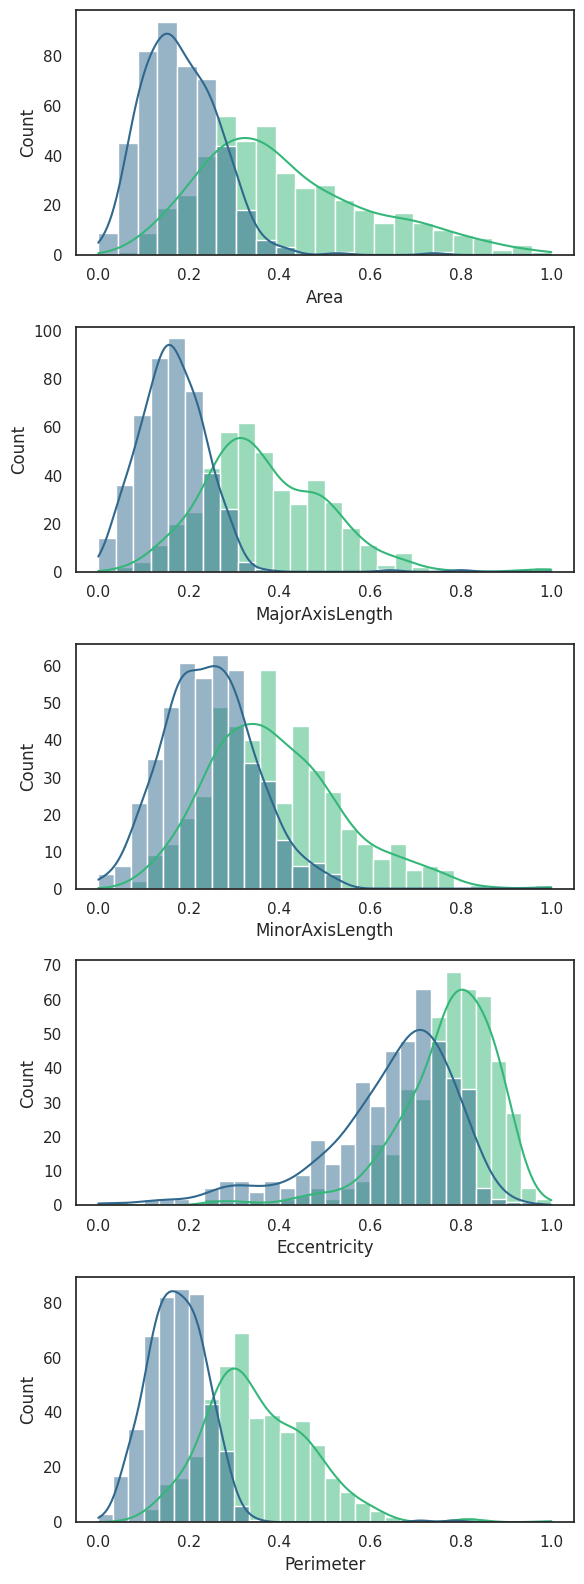

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", palette="viridis", context="notebook")

fig, axs = plt.subplots(figsize=(6, 16), ncols=1, nrows=5)

for i, column in enumerate(num_df.columns):
    sns.histplot(
        data=df,
        x=column,
        hue="Class",
        palette="viridis",
        kde=True,
        ax=axs[i],
        legend=False,
    )

plt.tight_layout()
plt.show()

In [16]:
rename_map = {
    "mean": "Mean",
    "std": "Std",
    "min": "Min",
    "50%": "Med",
    "25%": "1Q",
    "75%": "3Q",
    "max": "Max",
}

for cn in ["Kecimen", "Besni"]:
    stat_df = (
        df.loc[df["Class"] == cn].describe().drop("count").T.rename(columns=rename_map).T
    )

    stat_df.to_latex(
        f"./stat-{cn.lower()}.tex",
        float_format="%.3f",
        caption=f"Klasės {cn} aprašomoji statistika",
        label=f"tab:stat-{cn.lower()}",
        escape=True,
        bold_rows=True,
    )

    display(stat_df)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Mean,0.181372,0.164877,0.245698,0.641071,0.175406
Std,0.084555,0.077251,0.097711,0.150575,0.072308
Min,0.000000,0.000000,0.000000,0.000000,0.000000
1Q,0.119619,0.113918,0.176398,0.579596,0.128002
Med,0.171864,0.161475,0.243596,0.681033,0.172636
3Q,0.237365,0.213477,0.307187,0.738941,0.218480
Max,0.741729,0.801292,0.525550,0.937472,0.786309


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Mean,0.414041,0.367222,0.389922,0.770132,0.350729
Std,0.187112,0.137069,0.145636,0.111310,0.118731
Min,0.073047,0.062902,0.082617,0.248227,0.073471
1Q,0.277647,0.273327,0.283820,0.716128,0.270976
Med,0.376989,0.346727,0.371972,0.787785,0.330366
3Q,0.526072,0.462323,0.472209,0.847919,0.428834
Max,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# First, split into training and (validation + test)
train_df, val_test_df = train_test_split(
    df, test_size=0.3, random_state=42
)  # 70% training, 30% val + test

# Now split the (validation + test) into validation and test
validation_df, test_df = train_test_split(
    val_test_df, test_size=0.5, random_state=42
)  # Splitting the 30% into two parts of 15% each

rename_map = {
    "mean": "Mean",
    "std": "Std",
    "min": "Min",
    "50%": "Med",
    "25%": "1Q",
    "75%": "3Q",
    "max": "Max",
    "count": "Count"
}

display(df.describe().T.rename(columns=rename_map).T)
display(train_df.describe().T.rename(columns=rename_map).T)
display(validation_df.describe().T.rename(columns=rename_map).T)
display(test_df.describe().T.rename(columns=rename_map).T)

df.describe().T.rename(columns=rename_map).T.to_latex(
    f"./split-stat-full.tex",
    float_format="%.3f",
    caption=f"Originalios duomenų aibės aprašomoji statistika",
    label=f"tab:split-stat-full",
    escape=True,
    bold_rows=True,
)

train_df.describe().T.rename(columns=rename_map).T.to_latex(
    f"./split-stat-train.tex",
    float_format="%.3f",
    caption=f"Mokymo duomenų aibės aprašomoji statistika",
    label=f"tab:split-stat-train",
    escape=True,
    bold_rows=True,
)

validation_df.describe().T.rename(columns=rename_map).T.to_latex(
    f"./split-stat-validation.tex",
    float_format="%.3f",
    caption=f"Validavimo duomenų aibės aprašomoji statistika",
    label=f"tab:split-stat-validation",
    escape=True,
    bold_rows=True,
)

test_df.describe().T.rename(columns=rename_map).T.to_latex(
    f"./split-stat-test.tex",
    float_format="%.3f",
    caption=f"Testavimo duomenų aibės aprašomoji statistika",
    label=f"tab:split-stat-test",
    escape=True,
    bold_rows=True,
)

df.to_csv("./dataset-modified.csv")
train_df.to_csv("./train.csv")
validation_df.to_csv("./validation.csv")
test_df.to_csv("./test.csv")


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Count,900.000000,900.000000,900.000000,900.000000,900.000000
Mean,0.297706,0.266050,0.317810,0.705602,0.263067
Std,0.186026,0.150370,0.143414,0.147244,0.131701
Min,0.000000,0.000000,0.000000,0.000000,0.000000
1Q,0.161981,0.155267,0.216317,0.640756,0.167095
Med,0.255247,0.236080,0.298761,0.733812,0.240747
3Q,0.379859,0.348025,0.390682,0.805095,0.331612
Max,1.000000,1.000000,1.000000,1.000000,1.000000


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Count,630.000000,630.000000,630.000000,630.000000,630.000000
Mean,0.297545,0.264895,0.318015,0.704929,0.262270
Std,0.187061,0.146637,0.145289,0.148393,0.128435
Min,0.000000,0.000000,0.002604,0.000000,0.000000
1Q,0.162576,0.154540,0.215306,0.638417,0.167166
Med,0.252509,0.233647,0.298586,0.735936,0.238744
3Q,0.379726,0.350395,0.388974,0.809465,0.330568
Max,1.000000,0.801292,1.000000,0.937472,0.803787


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Count,135.000000,135.000000,135.000000,135.000000,135.000000
Mean,0.289846,0.265021,0.309570,0.707932,0.262200
Std,0.182378,0.164761,0.139541,0.145896,0.141723
Min,0.039244,0.002157,0.078293,0.113552,0.038650
1Q,0.154350,0.149626,0.213499,0.644857,0.152805
Med,0.239593,0.226619,0.292690,0.732932,0.246321
3Q,0.375138,0.339347,0.388331,0.796717,0.334980
Max,0.872255,1.000000,0.741821,1.000000,0.833681


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Count,135.000000,135.000000,135.000000,135.000000,135.000000
Mean,0.306318,0.272465,0.325094,0.706411,0.267654
Std,0.185783,0.153523,0.138947,0.144206,0.137212
Min,0.007255,0.008810,0.000000,0.156865,0.028740
1Q,0.172660,0.162262,0.223401,0.645091,0.172602
Med,0.262568,0.257681,0.303186,0.732212,0.245347
3Q,0.379662,0.353026,0.398024,0.801378,0.329957
Max,0.884938,0.982834,0.737570,0.943939,1.000000
